In [1]:
# main.py
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import numpy as np
import gc # Garbage collector
import os
os.chdir("C:/Users/larry/Desktop/Geoguessr ML Proj/Geolocation-Project/reverse_geocode3")

# Import from our modules
# import reverse_geocode3.config
# import reverse_geocode3.data_loader
# import reverse_geocode3.processing


import config
import data_loader
import processing

In [2]:
# --- Load Geospatial Data ---
try:
    countries = data_loader.load_countries()
    admin1 = data_loader.load_admin1()
    oceans = data_loader.load_oceans()
    # cities_filtered, city_kdtree = data_loader.load_cities_and_build_kdtree()
    cities_filtered, city_kdtree = data_loader.load_cities_and_build_kdtree_from_geonames()   
    land_geom = data_loader.create_unified_land(countries)
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure Natural Earth files are downloaded and paths in config.py are correct.")
except ValueError as e:
        print(f"Error processing data: {e}")
except Exception as e:
        print(f"An unexpected error occurred during data loading: {e}")

Loading country data...
Loaded 246 countries.
Loading Admin 1 data...
Loaded 4596 Admin 1 regions.
Loading ocean data...
Loaded 10 ocean/sea polygons.
Loading city data from GeoNames cities500.txt...
Reading natural_earth_data/cities500.txt ...
Loaded 215735 entries from GeoNames.

--- Loading Admin Name Mappings ---
Loading Admin1 names from natural_earth_data/admin1CodesASCII.txt...
Loaded 3893 Admin1 name mappings.
Loading Admin2 names from natural_earth_data/admin2Codes.txt...
Loaded 47356 Admin2 name mappings.

--- Mapping Admin Codes to Names ---
Admin1 names mapped.
Admin2 names mapped.
Converting GeoNames data to GeoDataFrame...
Building KDTree for GeoNames cities...
KDTree built successfully.
Creating unified land geometry...
Unified land geometry created.


In [3]:
admin1

,admin1_iso2,admin1_name,admin1_local_name,admin1_region,geometry
0,AR,Entre Ríos,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,UY,Paysandú,None,None,"POLYGON ((-58.20012 -32.4472, -58.20011 -32.44..."
2,ID,Kalimantan Timur,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,MY,Sabah,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,CL,Arica y Parinacota,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
...,...,...,...,...,...
4591,MT,Isla,None,Malta Xlokk,"POLYGON ((14.51073 35.88896, 14.51537 35.89113..."
4592,MT,Cospicua,None,Malta Xlokk,"POLYGON ((14.52937 35.88156, 14.527 35.87772, ..."
4593,MT,Pietà,None,Malta Majjistral,"POLYGON ((14.49801 35.89251, 14.49616 35.8883,..."
4594,MT,Msida,None,Malta Majjistral,"POLYGON ((14.48663 35.88636, 14.48231 35.88979..."


In [ ]:
print(countries.columns)
print(admin1.columns)
print(oceans.columns)
print(cities_filtered.columns)


Index(['country_iso2', 'country_region', 'country_subregion', 'geometry'], dtype='object')
Index(['admin1_iso2', 'admin1_name', 'admin1_alt_name', 'admin1_local_name',
       'admin1_region', 'geometry', 'admin1_name'],
      dtype='object')
Index(['ocean_name', 'geometry'], dtype='object')
Index(['city_name', 'city_alternate_names', 'city_latitude', 'city_longitude',
       'city_country_code', 'city_admin1_name', 'city_admin2_name',
       'geometry'],
      dtype='object')


In [12]:
temp = pd.read_csv(config.OUTPUT_FILE)
temp

C:\Users\larry\AppData\Local\Temp\ipykernel_18276\3761960488.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(config.OUTPUT_FILE)


,latitude,longitude,country_iso2,country_region,country_subregion,admin1_iso2,admin1_local_name,admin1_name,admin1_region,ocean_name,city_admin1_name,city_admin2_name,city_country_code,city_latitude,city_longitude,city_name,city_distance_km,climate_zone,land_cover_class,land_cover_probability
0,35.075424,-106.674995,US,Americas,Northern America,US,NaN,New Mexico,West,NaN,New Mexico,Bernalillo County,US,35.08449,-106.65114,Albuquerque,2.397,Cold semi-arid climate,Urban/Built-up,62.0
1,35.075721,-106.663576,US,Americas,Northern America,US,NaN,New Mexico,West,NaN,New Mexico,Bernalillo County,US,35.08449,-106.65114,Albuquerque,1.494,Cold semi-arid climate,Urban/Built-up,72.0
2,35.075800,-106.636760,US,Americas,Northern America,US,NaN,New Mexico,West,NaN,New Mexico,Bernalillo County,US,35.08449,-106.65114,Albuquerque,1.628,Cold semi-arid climate,Urban/Built-up,73.0
3,35.075887,-106.644925,US,Americas,Northern America,US,NaN,New Mexico,West,NaN,New Mexico,Bernalillo County,US,35.08449,-106.65114,Albuquerque,1.110,Cold semi-arid climate,Urban/Built-up,71.0
4,35.076840,-106.631114,US,Americas,Northern America,US,NaN,New Mexico,West,NaN,New Mexico,Bernalillo County,US,35.08449,-106.65114,Albuquerque,2.014,Cold semi-arid climate,Urban/Built-up,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66409,37.525111,127.287168,KR,Asia,Eastern Asia,KR,경기도,Gyeonggi,NaN,NaN,Gyeonggi-do,Hanam-si,KR,37.54000,127.20556,Hanam,7.400,Monsoon-influenced hot-summer humid continenta...,NaN,NaN
66410,37.525111,127.287168,KR,Asia,Eastern Asia,KR,경기도,Gyeonggi,NaN,NaN,Gyeonggi-do,Hanam-si,KR,37.54000,127.20556,Hanam,7.400,Monsoon-influenced hot-summer humid continenta...,NaN,NaN
66411,46.529410,6.652735,CH,Europe,Western Europe,CH,NaN,Vaud,NaN,NaN,Vaud,Lausanne District,CH,46.51600,6.63282,Lausanne,2.135,Temperate oceanic climate,NaN,NaN
66412,46.529410,6.652735,CH,Europe,Western Europe,CH,NaN,Vaud,NaN,NaN,Vaud,Lausanne District,CH,46.51600,6.63282,Lausanne,2.135,Temperate oceanic climate,NaN,NaN


In [13]:
set(temp[~temp["land_cover_class"].isna()]["land_cover_class"])

{'Barren',
 'Cultivated and Managed Vegetation',
 'Deciduous Broadleaf Trees',
 'Evergreen Broadleaf Trees',
 'Evergreen/Deciduous Needleleaf Trees',
 'Herbaceous',
 'Mixed Trees',
 'Open Water',
 'Regularly Flooded Vegetation',
 'Shrubs',
 'Snow/Ice',
 'Urban/Built-up'}

In [4]:
temp[~temp["ocean_name"].isna()]

,latitude,longitude,country_iso2,country_region,country_subregion,admin1_iso2,admin1_local_name,admin1_name,admin1_region,ocean_name,city_admin1_name,city_admin2_name,city_country_code,city_latitude,city_longitude,city_name,city_distance_km,climate_zone


In [9]:
temp[temp["country_iso2"].isna()]

,latitude,longitude,country_iso2,country_region,country_subregion,admin1_iso2,admin1_local_name,admin1_name,admin1_region,ocean_name,city_admin1_name,city_admin2_name,city_country_code,city_latitude,city_longitude,city_name,city_distance_km,climate_zone
26397,-22.12308,16.97189,NaN,Africa,Southern Africa,NaN,NaN,Otjozondjupa,NaN,NaN,NaN,NaN,NaN,-21.98141,16.9029,Okahandja,17.228,Hot desert climate


In [5]:
temp[temp["admin1_iso2"] != temp["country_iso2"]]

,latitude,longitude,country_iso2,country_region,country_subregion,admin1_iso2,admin1_local_name,admin1_name,admin1_region,ocean_name,city_admin1_name,city_admin2_name,city_country_code,city_latitude,city_longitude,city_name,city_distance_km,climate_zone
8828,11.001351,-2.747336,GH,Africa,Western Africa,BF,NaN,Ioba,Sud-Ouest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tropical savanna climate (dry winter)
9146,13.390924,-11.641202,SN,Africa,Western Africa,ML,NaN,Kayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot semi-arid climate
9932,13.390924,-11.641202,SN,Africa,Western Africa,ML,NaN,Kayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot semi-arid climate
10164,37.368548,43.089649,TR,Asia,Western Asia,IQ,NaN,Dihok,Kurdistan,NaN,Şırnak,NaN,TR,37.36860,43.07774,Yemişli,1.055,Hot-summer Mediterranean climate
10240,17.905549,-88.885030,BZ,Americas,Central America,MX,NaN,Quintana Roo,NaN,NaN,Quintana Roo,Othón P. Blanco,MX,17.89918,-88.88092,La Union,0.829,Tropical savanna climate (dry winter)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65944,10.908522,106.130546,KH,Asia,South-eastern Asia,VN,NaN,Long An,đồng bằng sông Cửu Long,NaN,Svay Rieng,Chantrea,KH,10.98431,106.12486,Chantrea,8.406,Tropical savanna climate (dry winter)
65945,10.908522,106.130546,KH,Asia,South-eastern Asia,VN,NaN,Long An,đồng bằng sông Cửu Long,NaN,Svay Rieng,Chantrea,KH,10.98431,106.12486,Chantrea,8.406,Tropical savanna climate (dry winter)
66279,45.974118,13.529808,IT,Europe,Southern Europe,SI,NaN,Brda,Goriška,NaN,Brda,NaN,SI,45.99639,13.52639,Dobrovo,2.490,Temperate oceanic climate
66280,45.974118,13.529808,IT,Europe,Southern Europe,SI,NaN,Brda,Goriška,NaN,Brda,NaN,SI,45.99639,13.52639,Dobrovo,2.490,Temperate oceanic climate


In [16]:
print(len(set(temp.admin1_iso2)))
print(len(set(temp.country_iso2)))
print(len(set(temp.city_country_code)))

130
128
132


In [4]:
# filepath = "../TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp"
# filepath = os.path.join(config.DATA_DIR, 'oceans/World_Geographic_Regionst.shp')
admin1 = data_loader._load_shapefile_helper(config.OUTPUT_FILE)
admin1

AttributeError: 'DataFrame' object has no attribute 'crs'

Loading world basemap...
Basemap CRS: EPSG:4326
Shapefile loaded successfully. Found 215735 features.
Shapefile CRS: EPSG:4326
Creating plot...
Plotting data with single color: blue
Displaying plot...


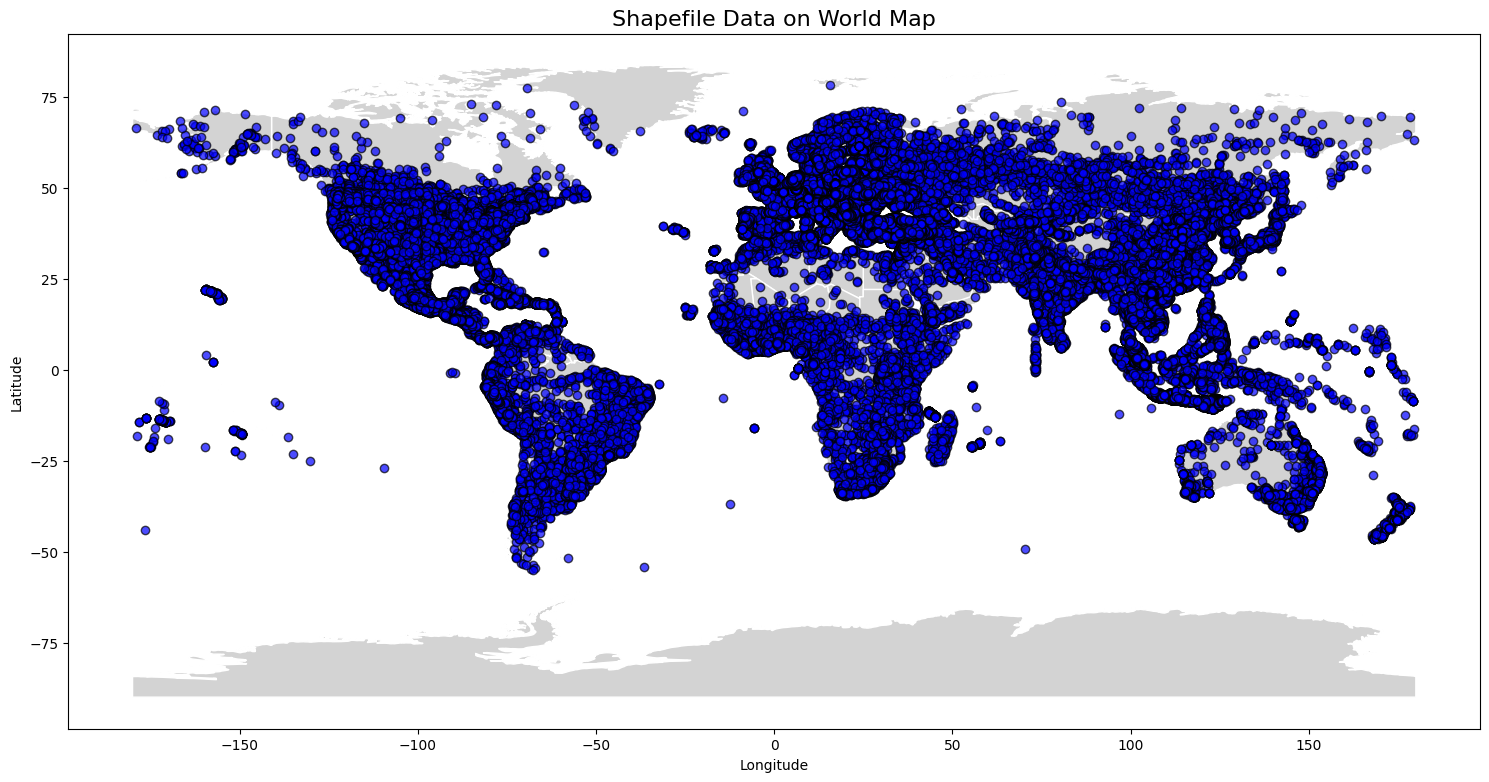

Plot closed.


In [23]:
# VISUALIZE STUFF
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Configuration ---
# REQUIRED: Set the path to your shapefile (.shp)
# Make sure all associated files (.dbf, .shx, .prj, etc.) are in the same directory.
# shapefile_path = 'path/to/your/data.shp' # <--- CHANGE THIS PATH

# Optional: Customize plot appearance
map_figsize = (15, 10)           # Figure size (width, height) in inches
basemap_color = 'lightgrey'      # Color for world continents
basemap_edgecolor = 'white'      # Color for continent borders
data_color = 'blue'              # Color for your shapefile features
data_edgecolor = 'black'         # Color for the border of your shapefile features
data_alpha = 0.7                 # Transparency of your shapefile features (0=transparent, 1=opaque)
plot_title = 'Shapefile Data on World Map'

# Optional: Color features based on a column in the shapefile
# Set 'column_to_plot' to the name of the column you want to use for coloring.
# Set 'cmap_scheme' to a matplotlib colormap name (e.g., 'viridis', 'plasma', 'coolwarm', 'RdYlGn').
# Set 'add_legend' to True if you want a color legend.
column_to_plot = None            # e.g., 'POPULATION' or 'CATEGORY' - Set to None to use single color
cmap_scheme = 'viridis'          # Colormap scheme if plotting by column
add_legend = True                # Add a legend if plotting by column

# --- Script Logic ---

try:
    # 1. Load the world basemap provided by geopandas
    # This uses the 'naturalearth_lowres' dataset which includes country boundaries.
    # You can also use 'naturalearth_hires' for more detail (requires separate download/install)
    # or load your own basemap shapefile.
    print("Loading world basemap...")
    world = gpd.read_file(
        "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
    )
    # We'll assume the standard WGS84 projection for the basemap (EPSG:4326)
    print(f"Basemap CRS: {world.crs}")

    # 2. Load your shapefile data
    # print(f"Loading shapefile data from: {shapefile_path}...")
    gdf_data = cities_filtered  #gpd.read_file(shapefile_path)
    print(f"Shapefile loaded successfully. Found {len(gdf_data)} features.")
    print(f"Shapefile CRS: {gdf_data.crs}")

    # 3. Coordinate Reference System (CRS) Handling
    # It's CRUCIAL that both layers use the same CRS for correct plotting.
    # We'll reproject the shapefile data to match the basemap's CRS if they differ.
    if gdf_data.crs != world.crs:
        print(f"Shapefile CRS ({gdf_data.crs}) differs from basemap CRS ({world.crs}). Reprojecting data...")
        gdf_data = gdf_data.to_crs(world.crs)
        print(f"Shapefile data reprojected to CRS: {gdf_data.crs}")

    # 4. Create the plot
    print("Creating plot...")
    fig, ax = plt.subplots(1, 1, figsize=map_figsize)
    ax.set_aspect('equal') # Ensure correct aspect ratio for map

    # 5. Plot the basemap (world)
    world.plot(ax=ax, color=basemap_color, edgecolor=basemap_edgecolor)

    # 6. Plot your shapefile data on top
    plot_kwargs = {
        'ax': ax,
        'edgecolor': data_edgecolor,
        'alpha': data_alpha
    }

    if column_to_plot and column_to_plot in gdf_data.columns:
        print(f"Plotting data colored by column '{column_to_plot}' using colormap '{cmap_scheme}'...")
        plot_kwargs['column'] = column_to_plot
        plot_kwargs['cmap'] = cmap_scheme
        if add_legend:
             # Add legend options for continuous data
            plot_kwargs['legend'] = True
            plot_kwargs['legend_kwds'] = {'label': f"{column_to_plot}",
                                         'orientation': "horizontal",
                                         'shrink': 0.5} # Adjust shrink as needed
        gdf_data.plot(**plot_kwargs)

    else:
        if column_to_plot:
             print(f"Warning: Column '{column_to_plot}' not found in shapefile. Plotting with single color.")
        print(f"Plotting data with single color: {data_color}")
        plot_kwargs['color'] = data_color
        gdf_data.plot(**plot_kwargs)


    # 7. Customize the plot appearance
    ax.set_title(plot_title, fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # Optional: Turn off axis ticks and labels for a cleaner map look
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # Ensure layout is tight
    plt.tight_layout()

    # 8. Show the plot
    print("Displaying plot...")
    plt.show()
    print("Plot closed.")

except FileNotFoundError:
    # print(f"Error: Shapefile not found at '{shapefile_path}'.")
    print("Please ensure the path is correct and the .shp file exists.")
except ImportError as e:
     print(f"Error: Missing required library. {e}")
     print("Please install geopandas and matplotlib (e.g., 'conda install geopandas matplotlib' or 'pip install geopandas matplotlib').")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Consider adding more specific error handling for geopandas/plotting issues if needed

Loading world basemap...
Basemap CRS: EPSG:4326
Shapefile loaded successfully. Found 1576038 features.
Shapefile CRS: EPSG:4326
Creating plot...
Plotting data with single color: blue
Displaying plot...


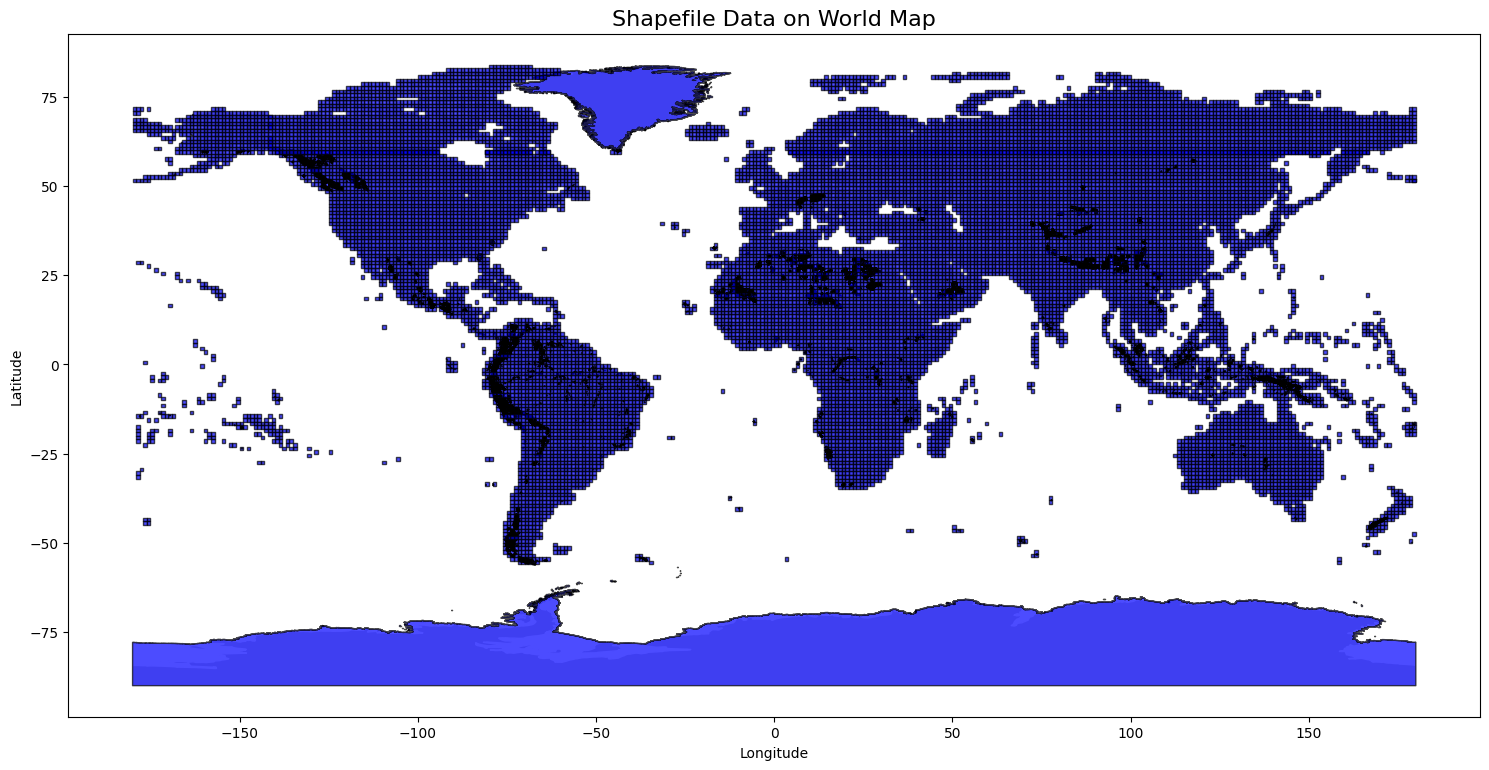

Plot closed.


In [ ]:
# VISUALIZE STUFF
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Configuration ---
# REQUIRED: Set the path to your shapefile (.shp)
# Make sure all associated files (.dbf, .shx, .prj, etc.) are in the same directory.
# shapefile_path = 'path/to/your/data.shp' # <--- CHANGE THIS PATH

# Optional: Customize plot appearance
map_figsize = (30, 20)           # Figure size (width, height) in inches
basemap_color = 'lightgrey'      # Color for world continents
basemap_edgecolor = 'white'      # Color for continent borders
data_color = 'blue'              # Color for your shapefile features
data_edgecolor = 'black'         # Color for the border of your shapefile features
data_alpha = 0.7                 # Transparency of your shapefile features (0=transparent, 1=opaque)
plot_title = 'Shapefile Data on World Map'

# Optional: Color features based on a column in the shapefile
# Set 'column_to_plot' to the name of the column you want to use for coloring.
# Set 'cmap_scheme' to a matplotlib colormap name (e.g., 'viridis', 'plasma', 'coolwarm', 'RdYlGn').
# Set 'add_legend' to True if you want a color legend.
column_to_plot = None            # e.g., 'POPULATION' or 'CATEGORY' - Set to None to use single color
cmap_scheme = 'viridis'          # Colormap scheme if plotting by column
add_legend = True                # Add a legend if plotting by column

# --- Script Logic ---

try:
    # 1. Load the world basemap provided by geopandas
    # This uses the 'naturalearth_lowres' dataset which includes country boundaries.
    # You can also use 'naturalearth_hires' for more detail (requires separate download/install)
    # or load your own basemap shapefile.
    print("Loading world basemap...")
    world = gpd.read_file(
        "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
    )
    # We'll assume the standard WGS84 projection for the basemap (EPSG:4326)
    print(f"Basemap CRS: {world.crs}")

    # 2. Load your shapefile data
    # print(f"Loading shapefile data from: {shapefile_path}...")
    gdf_data = gpd.read_file("reverse_geocode3/GMTED2010_Spatial_Metadata/GMTED2010_Spatial_Metadata.shp")
    print(f"Shapefile loaded successfully. Found {len(gdf_data)} features.")
    print(f"Shapefile CRS: {gdf_data.crs}")

    # 3. Coordinate Reference System (CRS) Handling
    # It's CRUCIAL that both layers use the same CRS for correct plotting.
    # We'll reproject the shapefile data to match the basemap's CRS if they differ.
    if gdf_data.crs != world.crs:
        print(f"Shapefile CRS ({gdf_data.crs}) differs from basemap CRS ({world.crs}). Reprojecting data...")
        gdf_data = gdf_data.to_crs(world.crs)
        print(f"Shapefile data reprojected to CRS: {gdf_data.crs}")

    # 4. Create the plot
    print("Creating plot...")
    fig, ax = plt.subplots(1, 1, figsize=map_figsize)
    ax.set_aspect('equal') # Ensure correct aspect ratio for map

    # 5. Plot the basemap (world)
    world.plot(ax=ax, color=basemap_color, edgecolor=basemap_edgecolor)

    # 6. Plot your shapefile data on top
    plot_kwargs = {
        'ax': ax,
        'edgecolor': data_edgecolor,
        'alpha': data_alpha
    }

    if column_to_plot and column_to_plot in gdf_data.columns:
        print(f"Plotting data colored by column '{column_to_plot}' using colormap '{cmap_scheme}'...")
        plot_kwargs['column'] = column_to_plot
        plot_kwargs['cmap'] = cmap_scheme
        if add_legend:
             # Add legend options for continuous data
            plot_kwargs['legend'] = True
            plot_kwargs['legend_kwds'] = {'label': f"{column_to_plot}",
                                         'orientation': "horizontal",
                                         'shrink': 0.5} # Adjust shrink as needed
        gdf_data.plot(**plot_kwargs)

    else:
        if column_to_plot:
             print(f"Warning: Column '{column_to_plot}' not found in shapefile. Plotting with single color.")
        print(f"Plotting data with single color: {data_color}")
        plot_kwargs['color'] = data_color
        gdf_data.plot(**plot_kwargs)


    # 7. Customize the plot appearance
    ax.set_title(plot_title, fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # Optional: Turn off axis ticks and labels for a cleaner map look
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # Ensure layout is tight
    plt.tight_layout()

    # 8. Show the plot
    print("Displaying plot...")
    plt.show()
    print("Plot closed.")

except FileNotFoundError:
    # print(f"Error: Shapefile not found at '{shapefile_path}'.")
    print("Please ensure the path is correct and the .shp file exists.")
except ImportError as e:
     print(f"Error: Missing required library. {e}")
     print("Please install geopandas and matplotlib (e.g., 'conda install geopandas matplotlib' or 'pip install geopandas matplotlib').")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Consider adding more specific error handling for geopandas/plotting issues if needed